<a href="https://colab.research.google.com/github/chenmingwei23/Sentiment-Analysis-using-Recurrent-Neural-Networks/blob/main/470326592_COMP5046_Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
*If there is something to be noted for the user, please mention here.* 

*If you are planning to implement a program with Object Oriented Programming style, please check the bottom of the this ipynb file*

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.1. Download Dataset

If you want to know how data has been saved in pickle file: see this [ipynb file](https://drive.google.com/file/d/1ZQUVBzgH7N2EbiyE3WTPx7JNe2eRTs36/view?usp=sharing)

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1lTD6bgRkmwguGAr30v-r0KBPdtnVneLb'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.pkl')  

id = '1pCUdlZMoj99UZHtqFeza86fvVQfFmDFX'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.pkl')  




import pickle
training_data = pickle.load(open("training_data.pkl","rb"))
testing_data = pickle.load(open("testing_data.pkl","rb"))

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data[0][0], training_data[0][1]))
print("------------------------------------")

------------------------------------
Size of training dataset: 8000
Size of testing dataset: 2000
------------------------------------
------------------------------------
Sample Data
LABEL: neg / SENTENCE: hopeless for tmr :(
------------------------------------


## 1.2. Preprocess data



*You are required to describe which data preprocessing techniques were conducted with justification of your decision. *

In [ ]:
# Please comment your code
import numpy as np

## Here to create text and label list for train and test
text_train = [s[1] for s in training_data]
text_test = [s[1] for s in testing_data]
label_train = [s[0] for s in training_data]
label_test = [s[0] for s in testing_data]

print(text_test[0])

@AndreaMarySmith very helpful .... Or will be once I stop crying :(


### **Process emojis, emoticons and punctuations**


In [ ]:
## Here I used emot library created by Neel Shah.
## He has put together a list of emoticons with the corresponding words as well as part of his Github repo. https://github.com/NeelShah18/emot
## Because we are going to apply sentiment analysis, the emoticons give some valuable information and so removing them might not be a good solution.
## For this reason, I converted the emoticons to specific description words according to Neel's library.
EMOTICONS_WORD = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

EMOTICONS = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
      |
      <3                         # heart
    )"""

contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"} 

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

In [ ]:
import re

## Here to remove the punctuation
## Replace the contraction first 
def remove_punctuation(text):
    x = str(text)
    #Remove user name first!
    x = re.sub('@[^\s]+','',x)
    #Remove \n
    x = re.sub("\n","",x)
    for word, initial in contraction_dict.items():
      x = x.replace(word, initial)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '')
    return x

## Here to convert emoticons to words
def convert_emoticons(text):
    for emot in EMOTICONS_WORD:
      text = re.sub(u'('+emot+')', "_".join(EMOTICONS_WORD[emot].replace(",","").split()), text)
    return text


##  Here to remove emoticons
def remove_emoticons(text):
   emoticon_pattern = re.compile(EMOTICONS, re.VERBOSE)
   return emoticon_pattern.sub(r'', text)

## Here to convert emojis
## Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile("["
                  u"\U0001F600-\U0001F64F"  # emoticons
                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                  u"\U00002500-\U00002BEF"  # chinese char
                  u"\U00002702-\U000027B0"
                  u"\U00002702-\U000027B0"
                  u"\U000024C2-\U0001F251"
                  u"\U0001f926-\U0001f937"
                  u"\U00010000-\U0010ffff"
                  u"\u2640-\u2642"
                  u"\u2600-\u2B55"
                  u"\u200d"
                  u"\u23cf"
                  u"\u23e9"
                  u"\u231a"
                  u"\ufe0f"  # dingbats
                  u"\u3030"
                  "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

## The punctuation removal's order is:
##        1. Remove emojis
##        2. Convert emoticons to its represented word
##        3. Remove punctuations
## Defferences between remove_with_emotioncons & remove_without_emoticons:
##      text = "It ain't a nice day[] :("
##      remove_with_emoticons(text) = It is not a nice day Frownsadandryorpouting
##      remove_without_emoticons = It is not a nice day
def remove_with_emoticons(text):
  text = remove_emoji(text)
  text = convert_emoticons(text)
  text = remove_punctuation(text)
  return text

def remove_without_emoticons(text):
  text = remove_emoji(text)
  text = remove_emoticons(text)
  text = remove_punctuation(text)
  return text

## text_train and text_test with emoticons convereted are for lexicon embeddinga and RNN sequenc model
text_train_withemoticons = [remove_with_emoticons(s) for s in text_train]
text_test_withemoticons = [remove_with_emoticons(s) for s in text_test]

## text_train and text_test without emoticons are for CBOW training section
text_train_withoutemoticons = [remove_without_emoticons(s) for s in text_train]
text_test_withoutemoticons = [remove_without_emoticons(s) for s in text_test]

print(text_train[:5])
print(text_train_withoutemoticons[:5])


['hopeless for tmr :(', "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(", '@Hegelbon That heart sliding into the waste basket. :(', '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too', 'Dang starting next week I have "work" :(']
['hopeless for tmr ', 'Everything in the kids section of IKEA is so cute Shame I am nearly 19 in 2 months ', ' That heart sliding into the waste basket ', ' I hate Japanese call him bani  Me too', 'Dang starting next week I have work ']


### **Lower Casing**


In [ ]:
## Case-Folding
text_train_lc = [s.lower() for s in text_train_withemoticons]
text_test_lc = [s.lower() for s in text_test_withemoticons]

text_train_withoutemoticons = [s.lower() for s in text_train_withoutemoticons]
text_test_withoutemoticons = [s.lower() for s in text_test_withoutemoticons]


### **Remove numbers**

In [ ]:
def remove_numbers(text):
  text_nonum = re.sub(r'\d+', '', text)
  return text_nonum

text_train_rn = [remove_numbers(s) for s in text_train_lc]
text_test_rn = [remove_numbers(s) for s in text_test_lc]

print(text_train_rn[:5])
print(text_test_rn[:5])

['hopeless for tmr frownsadandryorpouting', 'everything in the kids section of ikea is so cute shame i am nearly  in  months frownsadandryorpouting', ' that heart sliding into the waste basket frownsadandryorpouting', ' i hate japanese call him bani frownsadandryorpouting frownsadandryorpoutingme too', 'dang starting next week i have work frownsadandryorpouting']
[' very helpful  or will be once i stop crying frownsadandryorpouting', ' otl nevermind frownsadandryorpouting at least i got jeon so', 'and as soon as i tweeted that she planted her claws in my thigh for traction and zoomed away frownsadandryorpouting', ' damnit frownsadandryorpouting', ' i used to be prypv  wish i could relive those days and become nycpv buy there is no way to communicate with nyc or usa klm frownsadandryorpouting']


### **Remove URLs** 

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?\S+|www\S+')
    return url_pattern.sub(r'', text)

text_train_ru = [remove_urls(s) for s in text_train_rn]
text_test_ru = [remove_urls(s) for s in text_test_rn]

### **Tokenization**

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

text_train_tk = [word_tokenize(s) for s in text_train_ru]
text_test_tk = [word_tokenize(s) for s in text_test_ru]

print(text_test_tk[:5])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[['very', 'helpful', 'or', 'will', 'be', 'once', 'i', 'stop', 'crying', 'frownsadandryorpouting'], ['otl', 'nevermind', 'frownsadandryorpouting', 'at', 'least', 'i', 'got', 'jeon', 'so'], ['and', 'as', 'soon', 'as', 'i', 'tweeted', 'that', 'she', 'planted', 'her', 'claws', 'in', 'my', 'thigh', 'for', 'traction', 'and', 'zoomed', 'away', 'frownsadandryorpouting'], ['damnit', 'frownsadandryorpouting'], ['i', 'used', 'to', 'be', 'prypv', 'wish', 'i', 'could', 'relive', 'those', 'days', 'and', 'become', 'nycpv', 'buy', 'there', 'is', 'no', 'way', 'to', 'communicate', 'with', 'nyc', 'or', 'usa', 'klm', 'frownsadandryorpouting']]


### **Remove stopwords**

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords as sw

stop_words = sw.words()

text_train_ns=[]
for tokens in text_train_tk:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_train_ns.append(filtered_sentence)

text_test_ns=[]
for tokens in text_test_tk:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_test_ns.append(filtered_sentence)

print(text_train_ns[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['hopeless', 'tmr', 'frownsadandryorpouting']


### **Lemmatisation**

In [ ]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

text_train_le = []
for tokens in text_train_ns:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    text_train_le.append(lemma_sentence)

text_test_le = []
for tokens in text_test_ns:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    text_test_le.append(lemma_sentence)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
print(text_train_le[0])

['hopeless', 'tmr', 'frownsadandryorpouting']


### **Label encoding**

In [ ]:
import numpy as np

from sklearn.preprocessing import LabelEncoder

unique_labels = np.unique(label_train)

lEnc = LabelEncoder()
# Please encode the labels (Do NOT add new lines of code in this section)
label_train_encoded = lEnc.fit_transform(label_train)
label_test_encoded = lEnc.transform(label_test)


n_class = len(unique_labels)
print(unique_labels)
print(lEnc.transform(unique_labels))

['neg' 'pos']
[0 1]


# 2 - Model Implementation

## 2.1. Word Embeddings

In this section, I implemented the CBOW class by meself at first. But the training exectuting time is too long. Thus, I used gensim.models.word2vec learned from lab 2 and train the model as well.

In [ ]:
## In this section, I will implement Word2VEc with CBOW
## I will use 
import lxml
from lxml import etree
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import torch
import torch.nn as nn
import torch.optim as optim
from random import shuffle
import numpy as np
from gensim.models import Word2Vec
import pprint


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### **Download and use the TED script data from Google Drive**
The reason why I choose to use TED script is because the original twitter dataset is to small for word embedding training. TED dataset can have more that 20,000,000 words in total. This is a good dataset to train the model, which can enhance the accuracy.

After download the TED script data, add the original NLTK Twitter data together to make the dataset bigger. 

In [ ]:
id = '1B47OiEiG2Lo1jUY6hy_zMmHBxfKQuJ8-'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ted_en-20160408.xml')  
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')

target_text = etree.parse(targetXML)
parse_text = '\n'.join(target_text.xpath('//content/text()'))

#### Data Preprocessing for Word Embeddings

In [ ]:
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# Tokenising the sentence to process it by using NLTK library
sent_text=sent_tokenize(content_text)

# Removing punctuation and changing all characters to lower case
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)
normalized_text = normalized_text + text_train_withoutemoticons + text_test_withoutemoticons

## Tokenising each sentence to process individual word
## In my situation, I met a problem where world_tokenize would split the word such as "gonna" and "wanna" into "gon" "na" and "wan" "na".
## However, I'm using split() to split the normalised_text in my word_dict. In my word_dict, it's  "gonna" not "gon" "na".
## Thus, I will simplly use split() here instead of word_tonkenize()
tokenize = lambda x: x.split()
sentences=[]
sentences=[tokenize(sentence) for sentence in normalized_text]

# Prints only 10 (tokenised) sentences
print(sentences[:10])
## make dictionary so that we can reference each index of unique word
word_list = " ".join(normalized_text).split()
word_list = list(set(word_list))

word_dict = {w: i for i, w in enumerate(word_list)}

[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation'], ['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing'], ['consider', 'facit'], ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'], ['facit', 'was', 'a', 'fantastic', 'company'], ['they', 'were', 'born', 'deep', 'in', 'the', 'swedish', 'forest', 'and', 'they', 'made', 'the', 'best', 'mechanical', 'calculators', 'in', 'the', 'world'], ['everybody', 'used', 'them'], ['and', 'what', 'did', 'facit', 'do', 'when', 'the', 'electronic', 'calculator', 'came', 'along'], ['they', 'continued', 'doing', 'exactly', 'the', 'same']]


In [ ]:
print(len(sentences))

283424


### 2.1.1. CBOW model implemented by myself 



I make the window size = 10. Because this is a TED talk dataset, unlike Tweeet, during talks, people tend to speak more in order to make things clear. Thus, I chose to make the window size to 10. If the window size gets too big, it will increase the executing time.

57s

In [ ]:
cbow = []
window_size = 5

for s in sentences:
    shuffle(sentences)
    if len(s) < 2*window_size+1:
      continue
    if (len(cbow) > 100):
      break
    for i in range(window_size, len(s) - window_size):
        
        centre = word_dict[s[i]]
        context = []
        if i >= window_size and i < len(s) - window_size:
          for e in range(-window_size, window_size+1):
            if i+e != i:
              context.append(word_dict[s[i+e]])            
        elif i >= window_size and i >= len(s) - window_size:
          for e in range(-window_size, len(s) - i):
            if i+e != i:
              context.append(word_dict[s[i+e]])
        elif i < window_size and i < len(s) - window_size:
          for e in range(-i, window_size+1):
            if i+e != i:
              context.append(word_dict[s[i+e]])
        elif i < window_size and i >= len(s) - window_size:
          for e in range(-i, len(s) - i):
            if i+e != i:
              context.append(word_dict[s[i+e]])
        if len(context) == 3:
          print(len(s))
        cbow.append([context, centre])

print(len(cbow))


103


#### Build Word Embeddings Model

*You are required to describe how hyperparameters were decided with justification of your decision.*


*   voc_size: It is just a variable used to describe the size of the vocabulary's size.
*   learning rate: The learning rate is set to 0.1 here because if the learning rate is too small, it needs a bigger epoch as each update can only change a small value.
*   batch_size: According to my experiment, I tired batch size from 5 to 50, 25 is the best number which gives smallest loss and fastest executing.
*   embedding_size: I tried different embedding size from 2 to 25, if the embedding size goes too big, the execution time becomes long as well. If the embedding size is too small, the loss is too big. The proper value for embedding is around 15.
*   no_of_epochs: For the epoch, the larger the better. However, the execution time will become larger. Thus, 5000 is good for this model.



In [ ]:
voc_size = len(word_list)
learning_rate = 0.1
batch_size = 50
embedding_size = 20
no_of_epochs = 5000

In [ ]:
import numpy as np
def prepare_batch(data_temp):
    inputs = []
    labels = []

    for data_sample in data_temp:
        inputs.append(data_sample[0])
        labels.append(data_sample[1])  
    return np.array(inputs), np.array(labels)

In [ ]:
class CBOW(nn.Module):
    def __init__(self, voc_size, embedding_size):
        super(CBOW, self).__init__()
        self.emb = nn.Embedding(voc_size, embedding_size)
        self.linear1 = nn.Linear(embedding_size, voc_size, bias=False)

    def forward(self, x):
        hidden = self.emb(x)
        v_hat = torch.mean(hidden, dim=1)
        out = self.linear1(v_hat)
        return out


#### Train Word Embeddings Model

Execution time: Approximately 7 minutes

In [ ]:
## Create the cbow model
cbow_model = CBOW(voc_size, embedding_size)
## Use Pytorch’s CrossEntropyLoss here
criterion = nn.CrossEntropyLoss()
## Use SGD optimizer here to optimize 
optimiser = optim.SGD(cbow_model.parameters(), lr=learning_rate)

for epoch in range(no_of_epochs):

    shuffle(cbow)
    loss_sum = 0

    for ind in range(0,len(cbow),batch_size):
        data_temp = cbow[ind : min(ind+batch_size, len(cbow))]
        inputs_temp, labels_temp = prepare_batch(data_temp)

        inputs_torch = torch.LongTensor(inputs_temp)
        labels_torch = torch.LongTensor(labels_temp)

        optimiser.zero_grad()    
        outputs = cbow_model(inputs_torch)

        loss = criterion(outputs, labels_torch)
        loss.backward()
        optimiser.step()

        loss_sum += loss.item()

    if epoch % 500 == 499: 
        print('Epoch: %d, loss: %.4f' %(epoch + 1, loss_sum))

Epoch: 500, loss: 13.1062
Epoch: 1000, loss: 2.3964
Epoch: 1500, loss: 1.3747
Epoch: 2000, loss: 0.7798
Epoch: 2500, loss: 0.5061
Epoch: 3000, loss: 0.4690
Epoch: 3500, loss: 0.2830
Epoch: 4000, loss: 0.2545
Epoch: 4500, loss: 0.2484
Epoch: 5000, loss: 0.2064


### 2.1.2. CBOW model using gensim.models.word2vec

This is the model that I used for word embedding in all the following sections.


#### Preprocessing

In this model, I use TED scipts dataset to train the model. I want to compare the models which implemented by me from above section.

####  Build the model

hyperparameters decisions:


*   size: set to 200 to increase the accuracy. Can't make it too big because bigger size requires larger dataset.
*   min_count: Word which appears less than 3 times will be treated as garbage.
*   window: same as previous section.
*   workers: 4. To improve the executing time.
*   sg： paramenter for choosing CBOW moodel.



In [ ]:
# init word2vec class
cbow_model = Word2Vec(size=120,min_count=3,window=14,workers=4,sg=0)
cbow_model.build_vocab(sentences)

#### Train the model

*   sentences: train with the sentences data preprocessed by previous section
*   total_example:  Count of sentences.
*   epoch: Number of iterations (epochs) over the corpus. 10 iterations is good enough.
*   report_delay: Seconds to wait before reporting progress.
*   compute_loss: Set tp true to see the final loss of the model. The loss can be bit because it is actually the sum of every epoch's loss.


Execution time for this section: 90s.


In [ ]:
cbow_model.train(sentences,total_examples=cbow_model.corpus_count,epochs=10,report_delay=1,compute_loss = True)
training_loss = cbow_model.get_latest_training_loss()
print(training_loss)

14234954.0


In [ ]:
print(cbow_model.wv['man'])

[-5.4170126e-01 -5.2110844e+00  1.3627224e+00  3.8040823e-01
  3.7437376e-01 -7.9364341e-01 -2.8674278e-01  3.3084598e+00
  1.1990448e+00  8.2167268e-01 -1.2027617e+00 -1.1929119e+00
  3.1544983e+00 -3.5591011e+00  6.8504252e-02  1.5728794e+00
 -1.6204369e+00  1.0789050e+00  1.7920346e+00 -6.8356562e-01
  8.6778477e-02  3.0280361e+00  1.7762953e+00 -6.3605286e-02
  2.8622234e-01 -8.8769001e-01  1.7185143e+00 -6.9801487e-02
  1.5332454e+00 -3.3113927e-01  4.0364373e-03 -9.7478998e-01
 -3.3282821e+00  7.5332695e-01  8.7899995e-01  1.0849777e+00
  1.8036468e+00  1.2210861e+00  1.7178631e-01  3.2566744e-01
 -1.2578123e+00 -6.5835029e-01 -2.2846668e+00 -2.3982737e+00
  1.2854517e+00 -7.1217066e-01 -7.4666208e-01  4.4421753e-01
 -1.0329610e+00  1.2051090e+00  1.2344044e+00  4.1062827e+00
  1.7274361e+00  8.2451212e-01  1.2769604e-01  5.2406926e+00
 -2.4824922e+00 -2.2760220e+00 -2.4082885e+00  7.2698885e-01
 -7.6889408e-01 -2.3824179e+00 -9.0489930e-01  1.3245488e+00
  1.4030239e-01 -3.50743

In [ ]:
similar_words=cbow_model.wv.most_similar("baby")
pprint.pprint(similar_words)

[('child', 0.619963526725769),
 ('girl', 0.5880016088485718),
 ('boomers', 0.5752394199371338),
 ('mother', 0.5690854787826538),
 ('pregnancy', 0.5506044626235962),
 ('gaga', 0.541638195514679),
 ('teeth', 0.541024923324585),
 ('babies', 0.5362480878829956),
 ('goat', 0.5313705801963806),
 ('sister', 0.5231849551200867)]


## 2.2. Lexicon Embeddings

### 2.2.1. Lexicon-based Embedding

*[Optional] You are required to describe why you would like to use more than one-dimensional embedding.*

In [ ]:
# Download the opinion_lexicon dictionary from nltk
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')


[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

#### Get word_list for Twitter data

In [ ]:
word_set = set() 
for sent in text_train_le:  
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKOWN]')

In [ ]:
word_list = list(word_set) 
word_list.sort()

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

print(word_index)
print(len(word_list))


{'[PAD]': 0, '[UNKOWN]': 1, 'aa': 2, 'aaaaaaaaaaa': 3, 'aaaaaaaaaaaaa': 4, 'aaaaaaaaaaaah': 5, 'aaaaaand': 6, 'aaaaages': 7, 'aaaaahhhhhhhh': 8, 'aaaahh': 9, 'aaaahhh': 10, 'aaahhh': 11, 'aah': 12, 'aahhhh': 13, 'aaj': 14, 'aameenall': 15, 'aapke': 16, 'aaron': 17, 'aarwwi': 18, 'aayegi': 19, 'ab': 20, 'abandoned': 21, 'abandoning': 22, 'abby': 23, 'abbycan': 24, 'abbymill': 25, 'abes': 26, 'abhi': 27, 'abi': 28, 'abit': 29, 'able': 30, 'abligaverins': 31, 'aboard': 32, 'abouty': 33, 'abroad': 34, 'abrupt': 35, 'abscess': 36, 'absent': 37, 'absolute': 38, 'absolutely': 39, 'abstinence': 40, 'abt': 41, 'abu': 42, 'abusive': 43, 'abuti': 44, 'ac': 45, 'academic': 46, 'acads': 47, 'acc': 48, 'accentconfusion': 49, 'accept': 50, 'accepted': 51, 'access': 52, 'accessory': 53, 'accident': 54, 'accidentally': 55, 'accnt': 56, 'accommodate': 57, 'according': 58, 'account': 59, 'accumulated': 60, 'accurate': 61, 'ace': 62, 'acha': 63, 'ache': 64, 'achebe': 65, 'achi': 66, 'achieved': 67, 'achie

#### Lexicon embeddings 

Do the lexicon embedding by assigning each word a category index

*  not_in_dict: 0
*  negative: 1
*  positive: *2*

Approximately executing time for this section is: 2m34s.


In [ ]:
lexi_dict = {}
for word in word_list:
  if word in opinion_lexicon.negative():
    lexi_dict[word_index[word]] = 1
  elif word in opinion_lexicon.positive():
    lexi_dict[word_index[word]] = 2
  else:
    lexi_dict[word_index[word]] = 0

print(lexi_dict)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 1, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 1, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 2, 62: 0, 63: 0, 64: 1, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 1, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 2, 111: 2, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 2, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 2, 130: 0, 131: 0, 132: 1, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [ ]:
print(word_index["hopeless"])
print(lexi_dict[3906])

3906
1


## 2.3. Bi-directional RNN Sequence model

### 2.3.1. Apply/Import Word Embedding and Lexicon Embedding

Adding lexicon embedding's classes into word dictionary.

In [ ]:
word_index[9766] = 0
word_index[9767] = 1
word_index[9768] = 2


#### Padding

The length of each sentence in the Twitter dataset varys from 1 to 19.
* For length = 19, there is only 0.03%.
* For length = 18, there is only 0.05%.
* For length = 17, there is only 0.05%
* For length = 16, there is only 0.2%.
* ...

Below is the actual percentage data for each length of the sentence.

[1.3375%, 11.8%, 15.0375%, 14.675%, 11.2%, 8.8375%, 7.375%, 7.2%, 5.525%, 5.6125%, 4.5625%, 3.1625%, 1.9%, 0.925%, 0.4375%, 0.275%, 0.05%, 0.05%, 0.0375%]


Thus, I choose 18 as my sequence length.

Because in this section, I want to combine two embeddings: lexicon embedding and word embedding. Just simplly add the lexicon embedding number to the end of the sentence. The final size of a sequence is 18+18=36.
 
For example,

['hopeless', 'tmr', 'frownsadandryorpouting']

->

[8635, 3056, 3909, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, NEG, NOT_SURE, NOT_SURE, NOT_SURE, NOT_SURE, NOT_SURE, NOT_SURE, NOT_SURE, NOT_SURE, NOT_SURE, NOT_SURE, NOT_SURE, NOT_SURE,NOT_SURE,NOT_SURE,NOT_SURE,NOT_SURE,NOT_SURE,]

In [ ]:
seq_length = 18

def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        else:
            temp_encoded = temp_encoded[:seq_length]
        for s in range(18):
          temp_encoded.append(lexi_dict[temp_encoded[s]])
        
        sent_encoded.append(temp_encoded)

         
    return sent_encoded

train_pad_encoded = encode_and_add_padding(text_train_le, seq_length, word_index )
test_pad_encoded = encode_and_add_padding(text_test_le, seq_length, word_index )

print(train_pad_encoded[0:100])
print(text_train_le[0:100])

[[3906, 8632, 3053, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2608, 4600, 7393, 4068, 1898, 7517, 5733, 5529, 3053, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3750, 7733, 9237, 686, 3053, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3706, 4354, 1222, 643, 3053, 3080, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1945, 8012, 5785, 9277, 9462, 3053, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5996, 3322, 588, 2698, 3053, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5167, 7760, 3053, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [9462, 5750, 5564, 471, 7253, 3706, 8979, 7384, 3053, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0

#### Embedding lookup table

In [ ]:
import numpy as np
emb_dim = 120
emb_table = []
count = 0
for word in enumerate(word_list):
    #print(word[1])
    if word[1] in cbow_model.wv.vocab:
        count = count + 1
        emb_table.append(cbow_model.wv[word[1]])
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
print(count)
print(emb_table[2])

5468
[-0.28241345 -0.10544896 -0.14104694 -0.21511017  0.04580319 -0.18814008
 -0.15510978  0.14754431  0.23394822  0.32365882 -0.07999504  0.020554
  0.25255927 -0.15511537  0.03181538 -0.12329264  0.04726523 -0.00854806
 -0.03687858 -0.01126571 -0.08283217  0.04650865 -0.08902138 -0.13999195
 -0.01687707 -0.27591351  0.00770412  0.29727647  0.07548182 -0.12989923
  0.52068043 -0.22997883 -0.15439878  0.15712848  0.031958   -0.01015226
 -0.19919933  0.25919199  0.08236402 -0.3869144   0.16096243  0.07103205
  0.16621841  0.00680116 -0.14871147  0.11126444  0.13826278 -0.05115153
  0.13005637 -0.25507882 -0.30627757 -0.02346124 -0.1685731   0.24868815
  0.10900147  0.23874912  0.0569873  -0.04031371  0.06383377  0.04026775
 -0.12827654  0.16940846 -0.02729299  0.03050441 -0.18415217 -0.02975106
  0.0663992   0.03702991  0.20324665  0.17088893 -0.31054145  0.33265826
 -0.10887024 -0.11674632  0.50147629  0.29244736 -0.21093516 -0.02558828
  0.29694366 -0.09039949 -0.08583562  0.33218169

In [ ]:
print(len(cbow_model.wv.vocab))

29805


### 2.3.2. Build Sequence Model

Use CBOW model implemented in the previous section to transform the vector.


*You are required to describe how hyperparameters were decided with justification of your decision.*

hyperparameters decision:

* vocb_size: The dictionary size
* n_hidden: I choose 100 as it is the best number I have tried from 10 to 300.
* learning_rate: According to secion 3.3 Hyperparameter Testing, I choose the learning rate to be 0.001.
* batch_size: The best batch_size to be 4000 which can improve the execution time of the training.

In [ ]:
vocab_size = len(word_list)
n_hidden = 100
learning_rate = 0.001
batch_size = 4000
total_epoch = 14

In [ ]:
# Please comment your code
import torch
#You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score


class Bi_RNN_Model(nn.Module):
    def __init__(self):
        super(Bi_RNN_Model, self).__init__()
        # A simple lookup table that stores embeddings of a fixed dictionary and size.
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        # set the bidirectional to True
        self.rnn = nn.RNN(emb_dim, n_hidden, batch_first=True, bidirectional=True)
        self.linear = nn.Linear(2*n_hidden, n_class)

    def forward(self, x):    
        x = self.emb(x)    
        x, h_n = self.rnn(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        output = self.linear(hidden_out)
        return output



### 2.3.3. Train Sequence Model

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [ ]:
criterion = nn.CrossEntropyLoss()
model = Bi_RNN_Model().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,len(train_pad_encoded),batch_size):
        input_batch = train_pad_encoded[ind:min(ind+batch_size, len(train_pad_encoded))]
        target_batch = label_train_encoded[ind:min(ind+batch_size, len(train_pad_encoded))]
        input_batch_torch = torch.from_numpy(np.array(input_batch)).to(device)
        target_batch_torch = torch.from_numpy(np.array(target_batch)).view(-1).to(device)

        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    predicted = torch.argmax(outputs, -1)
    acc = accuracy_score(predicted.cpu().numpy(),target_batch_torch.cpu().numpy())
    print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')



Epoch: 1, loss: 0.80775, train_acc: 0.21
Epoch: 2, loss: 0.78768, train_acc: 0.25
Epoch: 3, loss: 0.75641, train_acc: 0.31
Epoch: 4, loss: 0.72558, train_acc: 0.41
Epoch: 5, loss: 0.69826, train_acc: 0.47
Epoch: 6, loss: 0.67512, train_acc: 0.51
Epoch: 7, loss: 0.65595, train_acc: 0.54
Epoch: 8, loss: 0.64033, train_acc: 0.56
Epoch: 9, loss: 0.62777, train_acc: 0.57
Epoch: 10, loss: 0.61784, train_acc: 0.58
Epoch: 11, loss: 0.61017, train_acc: 0.59
Epoch: 12, loss: 0.60443, train_acc: 0.59
Epoch: 13, loss: 0.60033, train_acc: 0.60
Epoch: 14, loss: 0.59763, train_acc: 0.60
Finished Training


# 3 - Evaluation


## 3.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence*)

In [ ]:
# Please comment your code


#The stanfordnlp glove github provides the google analogy test test questions files
!git clone https://github.com/stanfordnlp/GloVe.git

Cloning into 'GloVe'...
remote: Enumerating objects: 595, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 595 (delta 0), reused 1 (delta 0), pack-reused 592
Receiving objects: 100% (595/595), 222.33 KiB | 5.70 MiB/s, done.
Resolving deltas: 100% (338/338), done.


In [ ]:
vocab_words = []
vocab_size = 0
vectors = {}
vocab={}
ivocab={}
vector_dim = 0
W = []
W_norm = []

def get_W(vectors_file):
  with open(vectors_file, 'r') as f:
    for line in f.readlines()[1:]:  
      vals = line.rstrip().split(' ')
      vectors[vals[0]] = [float(x) for x in vals[1:]]

  vocab_words=list(vectors.keys())
  vocab_size = len(vocab_words)
  # print("Vocab size: ",str(vocab_size))

  vocab = {w: idx for idx, w in enumerate(vocab_words)}
  ivocab = {idx: w for idx, w in enumerate(vocab_words)}
  vector_dim = len(vectors[ivocab[0]])
  W = np.zeros((vocab_size, vector_dim))
  for word, v in vectors.items():
      if word == '<unk>':
          continue
      W[vocab[word], :] = v

  # normalize each word vector to unit length
  # Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
  W_norm = np.zeros(W.shape)
  d = (np.sum(W ** 2, 1) ** (0.5))
  W_norm = (W.T / d).T
  return vocab, W_norm


In [ ]:
def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0:
            print("ERROR: no lines of vocab kept for %s !" % filenames[i])
            print("Example missing line:", full_data[0])
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)

        

    print('Semantic accuracy: %.2f%%  (%i/%i)' % (100 * correct_sem / float(count_sem), correct_sem, count_sem))
    print('Syntactic accuracy: %.2f%%  (%i/%i)' % (100 * correct_syn / float(count_syn), correct_syn, count_syn))
    print('Total accuracy: %.2f%%  (%i/%i)' % (100 * correct_tot / float(count_tot), correct_tot, count_tot))
    return correct_tot/count_tot, correct_sem/count_tot, correct_syn/count_tot

#### Testing accuracy on  Symmetric context with different vector dimension and window size

Create 30 models with different vector dimension. Save the vectors to the specific file. 

Creat 16 models with different window size.


Execution time: 35 minutes

In [ ]:
# cbow model with different Vector Dimension from 50 to 300
# create vector file for each model
wv_cbow_model_vd_1 = Word2Vec(sentences=sentences, size=10, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_1.wv.save_word2vec_format('cbow_w2v_vector_1.txt', binary=False)
wv_cbow_model_vd_2 = Word2Vec(sentences=sentences, size=20, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_2.wv.save_word2vec_format('cbow_w2v_vector_2.txt', binary=False)
wv_cbow_model_vd_3 = Word2Vec(sentences=sentences, size=30, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_3.wv.save_word2vec_format('cbow_w2v_vector_3.txt', binary=False)
wv_cbow_model_vd_4 = Word2Vec(sentences=sentences, size=40, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_4.wv.save_word2vec_format('cbow_w2v_vector_4.txt', binary=False)
wv_cbow_model_vd_5 = Word2Vec(sentences=sentences, size=50, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_5.wv.save_word2vec_format('cbow_w2v_vector_5.txt', binary=False)  
wv_cbow_model_vd_6 = Word2Vec(sentences=sentences, size=60, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_6.wv.save_word2vec_format('cbow_w2v_vector_6.txt', binary=False)
wv_cbow_model_vd_7 = Word2Vec(sentences=sentences, size=70, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_7.wv.save_word2vec_format('cbow_w2v_vector_7.txt', binary=False)
wv_cbow_model_vd_8 = Word2Vec(sentences=sentences, size=80, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_8.wv.save_word2vec_format('cbow_w2v_vector_8.txt', binary=False)
wv_cbow_model_vd_9 = Word2Vec(sentences=sentences, size=90, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_9.wv.save_word2vec_format('cbow_w2v_vector_9.txt', binary=False)
wv_cbow_model_vd_10 = Word2Vec(sentences=sentences, size=100, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_10.wv.save_word2vec_format('cbow_w2v_vector_10.txt', binary=False)
wv_cbow_model_vd_11 = Word2Vec(sentences=sentences, size=110, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_11.wv.save_word2vec_format('cbow_w2v_vector_11.txt', binary=False)
wv_cbow_model_vd_12 = Word2Vec(sentences=sentences, size=120, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_12.wv.save_word2vec_format('cbow_w2v_vector_12.txt', binary=False)
wv_cbow_model_vd_13 = Word2Vec(sentences=sentences, size=130, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_13.wv.save_word2vec_format('cbow_w2v_vector_13.txt', binary=False)
wv_cbow_model_vd_14 = Word2Vec(sentences=sentences, size=140, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_14.wv.save_word2vec_format('cbow_w2v_vector_14.txt', binary=False)
wv_cbow_model_vd_15 = Word2Vec(sentences=sentences, size=150, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_15.wv.save_word2vec_format('cbow_w2v_vector_15.txt', binary=False)
wv_cbow_model_vd_16 = Word2Vec(sentences=sentences, size=160, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_16.wv.save_word2vec_format('cbow_w2v_vector_16.txt', binary=False)
wv_cbow_model_vd_17 = Word2Vec(sentences=sentences, size=170, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_17.wv.save_word2vec_format('cbow_w2v_vector_17.txt', binary=False)
wv_cbow_model_vd_18 = Word2Vec(sentences=sentences, size=180, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_18.wv.save_word2vec_format('cbow_w2v_vector_18.txt', binary=False)
wv_cbow_model_vd_19 = Word2Vec(sentences=sentences, size=190, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_19.wv.save_word2vec_format('cbow_w2v_vector_19.txt', binary=False)
wv_cbow_model_vd_20 = Word2Vec(sentences=sentences, size=200, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_20.wv.save_word2vec_format('cbow_w2v_vector_20.txt', binary=False)
wv_cbow_model_vd_21 = Word2Vec(sentences=sentences, size=210, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_21.wv.save_word2vec_format('cbow_w2v_vector_21.txt', binary=False)
wv_cbow_model_vd_22 = Word2Vec(sentences=sentences, size=220, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_22.wv.save_word2vec_format('cbow_w2v_vector_22.txt', binary=False)
wv_cbow_model_vd_23 = Word2Vec(sentences=sentences, size=230, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_23.wv.save_word2vec_format('cbow_w2v_vector_23.txt', binary=False)
wv_cbow_model_vd_24 = Word2Vec(sentences=sentences, size=240, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_24.wv.save_word2vec_format('cbow_w2v_vector_24.txt', binary=False)
wv_cbow_model_vd_25 = Word2Vec(sentences=sentences, size=250, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_25.wv.save_word2vec_format('cbow_w2v_vector_25.txt', binary=False)  
wv_cbow_model_vd_26 = Word2Vec(sentences=sentences, size=260, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_26.wv.save_word2vec_format('cbow_w2v_vector_26.txt', binary=False)
wv_cbow_model_vd_27 = Word2Vec(sentences=sentences, size=270, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_7.wv.save_word2vec_format('cbow_w2v_vector_27.txt', binary=False)
wv_cbow_model_vd_28 = Word2Vec(sentences=sentences, size=280, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_28.wv.save_word2vec_format('cbow_w2v_vector_28.txt', binary=False)
wv_cbow_model_vd_29 = Word2Vec(sentences=sentences, size=290, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_29.wv.save_word2vec_format('cbow_w2v_vector_29.txt', binary=False)
wv_cbow_model_vd_30 = Word2Vec(sentences=sentences, size=300, window=2, min_count=10, workers=8, sg=0)
wv_cbow_model_vd_30.wv.save_word2vec_format('cbow_w2v_vector_30.txt', binary=False)


wv_cbow_model_wd_1 = Word2Vec(sentences=sentences, size=50, window=1, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_1.wv.save_word2vec_format('cbow_w2v_window_1.txt', binary=False)
wv_cbow_model_wd_2 = Word2Vec(sentences=sentences, size=50, window=2, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_2.wv.save_word2vec_format('cbow_w2v_window_2.txt', binary=False)
wv_cbow_model_wd_3 = Word2Vec(sentences=sentences, size=50, window=3, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_3.wv.save_word2vec_format('cbow_w2v_window_3.txt', binary=False)
wv_cbow_model_wd_4 = Word2Vec(sentences=sentences, size=50, window=4, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_4.wv.save_word2vec_format('cbow_w2v_window_4.txt', binary=False)
wv_cbow_model_wd_5 = Word2Vec(sentences=sentences, size=50, window=5, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_5.wv.save_word2vec_format('cbow_w2v_window_5.txt', binary=False)
wv_cbow_model_wd_6 = Word2Vec(sentences=sentences, size=50, window=6, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_6.wv.save_word2vec_format('cbow_w2v_window_6.txt', binary=False)
wv_cbow_model_wd_7 = Word2Vec(sentences=sentences, size=50, window=7, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_7.wv.save_word2vec_format('cbow_w2v_window_7.txt', binary=False)
wv_cbow_model_wd_8 = Word2Vec(sentences=sentences, size=50, window=8, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_8.wv.save_word2vec_format('cbow_w2v_window_8.txt', binary=False)
wv_cbow_model_wd_9 = Word2Vec(sentences=sentences, size=50, window=9, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_9.wv.save_word2vec_format('cbow_w2v_window_9.txt', binary=False)
wv_cbow_model_wd_10 = Word2Vec(sentences=sentences, size=50, window=10, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_10.wv.save_word2vec_format('cbow_w2v_window_10.txt', binary=False)
wv_cbow_model_wd_11 = Word2Vec(sentences=sentences, size=50, window=11, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_11.wv.save_word2vec_format('cbow_w2v_window_11.txt', binary=False)
wv_cbow_model_wd_12 = Word2Vec(sentences=sentences, size=50, window=12, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_12.wv.save_word2vec_format('cbow_w2v_window_12.txt', binary=False)
wv_cbow_model_wd_13 = Word2Vec(sentences=sentences, size=50, window=13, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_13.wv.save_word2vec_format('cbow_w2v_window_13.txt', binary=False)
wv_cbow_model_wd_14 = Word2Vec(sentences=sentences, size=50, window=14, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_14.wv.save_word2vec_format('cbow_w2v_window_14.txt', binary=False)
wv_cbow_model_wd_15 = Word2Vec(sentences=sentences, size=50, window=15, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_15.wv.save_word2vec_format('cbow_w2v_window_15.txt', binary=False)
wv_cbow_model_wd_16 = Word2Vec(sentences=sentences, size=50, window=16, min_count=1, workers=4, sg=0)
wv_cbow_model_wd_16.wv.save_word2vec_format('cbow_w2v_window_16.txt', binary=False)

#### Vector Size accuracy relationship diagram

Draw the diagram with different vector dimensions. The x-axis would be different vector dimensions from 10 to 300, and the y-axis would be the accuracy. We can see from the testing result, when the vector dimension is 120, the accuracy score becomes the highest. Three lines basically have the same trend and shape. 



In [ ]:
# Record the total accuracy of each model 
accuracy = []
accuracy_sem = []
accuracy_syn = []

# method to update overall accuracy, semantic accuracy and syntactic accuracy to the lists
def update_accuracy(file_name):
  vocab, W_norm = get_W(file_name)
  tot, sem, syn = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')
  accuracy.append(tot*100)
  accuracy_sem.append(sem*100)
  accuracy_syn.append(syn*100)

print("vector dimension is 10:")
update_accuracy('cbow_w2v_vector_1.txt')
print("")
print("vector dimension is 20:")
update_accuracy('cbow_w2v_vector_2.txt')
print("")
print("vector dimension is 30:")
update_accuracy('cbow_w2v_vector_3.txt')
print("")
print("vector dimension is 40:")
update_accuracy('cbow_w2v_vector_4.txt')
print("")
print("vector dimension is 50:")
update_accuracy('cbow_w2v_vector_5.txt')
print("")
print("vector dimension is 60:")
update_accuracy('cbow_w2v_vector_6.txt')
print("")
print("vector dimension is 70:")
update_accuracy('cbow_w2v_vector_7.txt')
print("")
print("vector dimension is 80:")
update_accuracy('cbow_w2v_vector_8.txt')
print("")
print("vector dimension is 90:")
update_accuracy('cbow_w2v_vector_9.txt')
print("")
print("vector dimension is 100:")
update_accuracy('cbow_w2v_vector_10.txt')
print("")
print("vector dimension is 110:")
update_accuracy('cbow_w2v_vector_11.txt')
print("")
print("vector dimension is 120:")
update_accuracy('cbow_w2v_vector_12.txt')
print("")
print("vector dimension is 130:")
update_accuracy('cbow_w2v_vector_13.txt')
print("")
print("vector dimension is 140:")
update_accuracy('cbow_w2v_vector_14.txt')
print("")
print("vector dimension is 150:")
update_accuracy('cbow_w2v_vector_15.txt')
print("")
print("vector dimension is 160:")
update_accuracy('cbow_w2v_vector_16.txt')
print("")
print("vector dimension is 170:")
update_accuracy('cbow_w2v_vector_17.txt')
print("")
print("vector dimension is 180:")
update_accuracy('cbow_w2v_vector_18.txt')
print("")
print("vector dimension is 190:")
update_accuracy('cbow_w2v_vector_19.txt')
print("")
print("vector dimension is 200:")
update_accuracy('cbow_w2v_vector_20.txt')
print("")
print("vector dimension is 210:")
update_accuracy('cbow_w2v_vector_21.txt')
print("")
print("vector dimension is 220:")
update_accuracy('cbow_w2v_vector_22.txt')
print("")
print("vector dimension is 230:")
update_accuracy('cbow_w2v_vector_23.txt')
print("")
print("vector dimension is 240:")
update_accuracy('cbow_w2v_vector_24.txt')
print("")
print("vector dimension is 250:")
update_accuracy('cbow_w2v_vector_25.txt')
print("")
print("vector dimension is 260:")
update_accuracy('cbow_w2v_vector_26.txt')
print("")
print("vector dimension is 270:")
update_accuracy('cbow_w2v_vector_27.txt')
print("")
print("vector dimension is 280:")
update_accuracy('cbow_w2v_vector_28.txt')
print("")
print("vector dimension is 290:")
update_accuracy('cbow_w2v_vector_29.txt')
print("")
print("vector dimension is 300:")
update_accuracy('cbow_w2v_vector_30.txt')
print("")

vector dimension is 10:
Semantic accuracy: 10.09%  (94/932)
Syntactic accuracy: 2.62%  (187/7146)
Total accuracy: 3.48%  (281/8078)

vector dimension is 20:
Semantic accuracy: 14.81%  (138/932)
Syntactic accuracy: 7.67%  (548/7146)
Total accuracy: 8.49%  (686/8078)

vector dimension is 30:
Semantic accuracy: 13.09%  (122/932)
Syntactic accuracy: 11.57%  (827/7146)
Total accuracy: 11.75%  (949/8078)

vector dimension is 40:
Semantic accuracy: 14.38%  (134/932)
Syntactic accuracy: 13.98%  (999/7146)
Total accuracy: 14.03%  (1133/8078)

vector dimension is 50:
Semantic accuracy: 16.85%  (157/932)
Syntactic accuracy: 16.13%  (1153/7146)
Total accuracy: 16.22%  (1310/8078)

vector dimension is 60:
Semantic accuracy: 15.99%  (149/932)
Syntactic accuracy: 17.53%  (1253/7146)
Total accuracy: 17.36%  (1402/8078)

vector dimension is 70:
Semantic accuracy: 17.27%  (161/932)
Syntactic accuracy: 19.02%  (1359/7146)
Total accuracy: 18.82%  (1520/8078)

vector dimension is 80:
Semantic accuracy: 17.

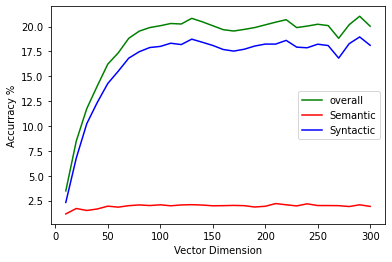

In [ ]:
import matplotlib.pyplot as plt

# data to be plotted
x = np.arange(10, 310, 10) 
y_overall = np.array(accuracy)
y_sem = np.array(accuracy_sem)
y_syn = np.array(accuracy_syn)
# plotting

plt.xlabel("Vector Dimension") 
plt.ylabel("Accurracy %") 
plt.plot(x, y_overall, color ="green", label = "overall") 
plt.plot(x, y_sem, color ="red", label = "Semantic") 
plt.plot(x, y_syn, color ="blue", label = "Syntactic") 
plt.legend()
plt.show()

#### Window Size accuracy relationship diagram

We can see from the testing result, when window size is 14, the accuracy score becomes the highest. Three lines basically have the same trend and shape. 

In [ ]:
#  clear the list
accuracy.clear()
accuracy_sem.clear()
accuracy_syn.clear()

print("window size is 1:")
update_accuracy('cbow_w2v_window_1.txt')
print("")
print("window size is 2:")
update_accuracy('cbow_w2v_window_2.txt')
print("")
print("window size is 3:")
update_accuracy('cbow_w2v_window_3.txt')
print("")
print("window size is 4:")
update_accuracy('cbow_w2v_window_4.txt')
print("")
print("window size is 5:")
update_accuracy('cbow_w2v_window_5.txt')
print("")
print("window size is 6:")
update_accuracy('cbow_w2v_window_6.txt')
print("")
print("window size is 7:")
update_accuracy('cbow_w2v_window_7.txt')
print("")
print("window size is 8:")
update_accuracy('cbow_w2v_window_8.txt')
print("")
print("window size is 9:")
update_accuracy('cbow_w2v_window_9.txt')
print("")
print("window size is 10:")
update_accuracy('cbow_w2v_window_10.txt')
print("")
print("window size is 11:")
update_accuracy('cbow_w2v_window_11.txt')
print("")
print("window size is 12:")
update_accuracy('cbow_w2v_window_12.txt')
print("")
print("window size is 13:")
update_accuracy('cbow_w2v_window_13.txt')
print("")
print("window size is 14:")
update_accuracy('cbow_w2v_window_14.txt')
print("")
print("window size is 15:")
update_accuracy('cbow_w2v_window_15.txt')
print("")
print("window size is 16:")
update_accuracy('cbow_w2v_window_16.txt')

window size is 1:
Semantic accuracy: 5.10%  (217/4257)
Syntactic accuracy: 11.33%  (1153/10173)
Total accuracy: 9.49%  (1370/14430)

window size is 2:
Semantic accuracy: 5.36%  (228/4257)
Syntactic accuracy: 11.15%  (1134/10173)
Total accuracy: 9.44%  (1362/14430)

window size is 3:
Semantic accuracy: 4.63%  (197/4257)
Syntactic accuracy: 11.64%  (1184/10173)
Total accuracy: 9.57%  (1381/14430)

window size is 4:
Semantic accuracy: 4.06%  (173/4257)
Syntactic accuracy: 11.70%  (1190/10173)
Total accuracy: 9.45%  (1363/14430)

window size is 5:
Semantic accuracy: 4.04%  (172/4257)
Syntactic accuracy: 11.07%  (1126/10173)
Total accuracy: 9.00%  (1298/14430)

window size is 6:
Semantic accuracy: 4.49%  (191/4257)
Syntactic accuracy: 11.34%  (1154/10173)
Total accuracy: 9.32%  (1345/14430)

window size is 7:
Semantic accuracy: 5.19%  (221/4257)
Syntactic accuracy: 10.61%  (1079/10173)
Total accuracy: 9.01%  (1300/14430)

window size is 8:
Semantic accuracy: 3.66%  (156/4257)
Syntactic accu

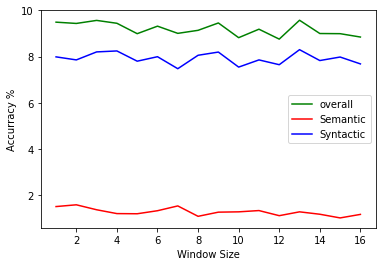

In [ ]:
x = np.arange(1, 17, 1) 
y_overall = np.array(accuracy)
y_sem = np.array(accuracy_sem)
y_syn = np.array(accuracy_syn)
# plotting

plt.xlabel("Window Size") 
plt.ylabel("Accurracy %") 
plt.plot(x, y_overall, color ="green", label = "overall") 
plt.plot(x, y_sem, color ="red", label = "Semantic") 
plt.plot(x, y_syn, color ="blue", label = "Syntactic") 
plt.legend()
plt.show()

## 3.2. Performance Evaluation


The overall precision and recall accuracy looks good, there is not much difference between class 0 and class 1. f1-score is larger than 0.4 which means the model has good prediction result.


In [ ]:
model.eval()
outputs = model(torch.from_numpy(np.array(test_pad_encoded)).to(device)) 
predicted = torch.argmax(outputs, 1)
from sklearn.metrics import classification_report
print(classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4))

              precision    recall  f1-score   support

           0     0.6225    0.6910    0.6550      1000
           1     0.6528    0.5810    0.6148      1000

    accuracy                         0.6360      2000
   macro avg     0.6377    0.6360    0.6349      2000
weighted avg     0.6377    0.6360    0.6349      2000



## 3.3. Hyperparameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.


According to the testing result, when learning rate is 0.001 and number of epoch is 14, it has the highest f1 score.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


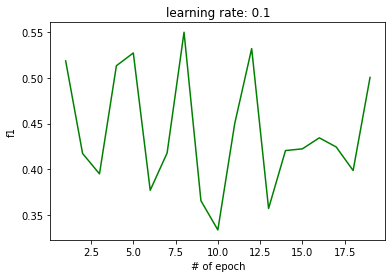

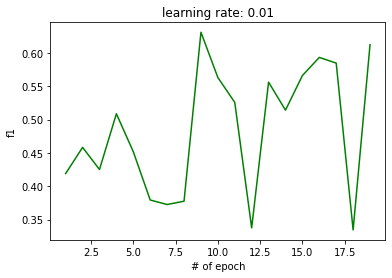

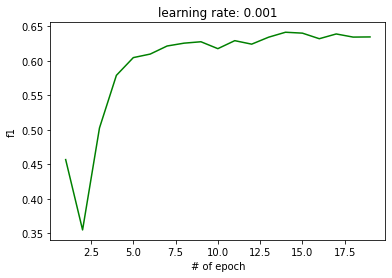

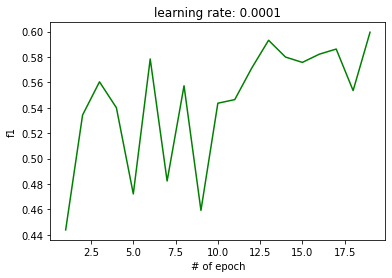

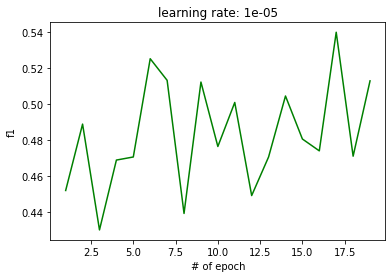

In [ ]:
# Please comment your code
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score


f1_array = []
def get_f1(total_epoch, learning_rate):

  criterion = nn.CrossEntropyLoss()
  model = Bi_RNN_Model().to(device)
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  for epoch in range(total_epoch):
      train_loss = 0
      for ind in range(0,len(train_pad_encoded),batch_size):
          input_batch = train_pad_encoded[ind:min(ind+batch_size, len(train_pad_encoded))]
          target_batch = label_train_encoded[ind:min(ind+batch_size, len(train_pad_encoded))]
          input_batch_torch = torch.from_numpy(np.array(input_batch)).to(device)
          target_batch_torch = torch.from_numpy(np.array(target_batch)).view(-1).to(device)

          model.train()
          optimizer.zero_grad()
          outputs = model(input_batch_torch) 
          loss = criterion(outputs, target_batch_torch)
          loss.backward()
          optimizer.step()
          
          train_loss += loss.item()
  model.eval()
  outputs = model(torch.from_numpy(np.array(test_pad_encoded)).to(device)) 
  predicted = torch.argmax(outputs, 1)
  report = classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4)
  precision,recall,fscore,support=score(label_test_encoded,predicted.cpu().numpy(),average='macro')
  f1_array.append(fscore)


def draw_epoch_diagram(learning_rate):
  f1_array.clear()
  for total_epoch in range(1,20):
    get_f1(total_epoch, learning_rate)

  x = np.arange(1, 20, 1) 
  y = np.array(f1_array)
  # plotting
  plt.title('learning rate: {}'.format(learning_rate))
  plt.xlabel("# of epoch") 
  plt.ylabel("f1") 
  plt.plot(x, y, color ="green") 
  plt.show()

draw_epoch_diagram(0.1)
draw_epoch_diagram(0.01)
draw_epoch_diagram(0.001)
draw_epoch_diagram(0.0001)
draw_epoch_diagram(0.00001)

## Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed* 

In [ ]:
# If you used OOP style, use this section